In [1]:
print("Kernel OK")

Kernel OK


In [2]:
import re
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

In [3]:
docs = [
    "Space missions require rockets satellites orbit and propulsion systems",
    "NASA launches spacecraft and studies planets stars and galaxies",
    "Cars need engines fuel efficiency brakes safety and maintenance",
    "Automobile companies design vehicles with mileage performance and comfort",
    "Computer graphics includes rendering images 3D models animation and shading",
    "Graphics pipelines use textures lighting and ray tracing techniques",
    "Politics involves elections government policy debates and public opinion",
    "Parliament discusses laws budgets parties and national governance",
    "Medical research uses clinical trials hospitals vaccines and treatments",
    "Doctors study diseases symptoms diagnosis and patient care"
]
print("Docs:", len(docs))
print(docs[0])

Docs: 10
Space missions require rockets satellites orbit and propulsion systems


In [4]:
count_vec = CountVectorizer(stop_words="english", max_features=800)
X_counts = count_vec.fit_transform(docs)

tfidf_vec = TfidfVectorizer(stop_words="english", max_features=800)
X_tfidf = tfidf_vec.fit_transform(docs)

print("X_counts shape:", X_counts.shape)
print("X_tfidf shape :", X_tfidf.shape)

X_counts shape: (10, 76)
X_tfidf shape : (10, 76)


In [5]:
lda = LatentDirichletAllocation(
    n_components=4,
    max_iter=10,
    learning_method="batch",
    random_state=42
)
lda.fit(X_counts)

lda_perp = lda.perplexity(X_counts)
print("LDA Perplexity:", lda_perp)

LDA Perplexity: 164.0069675382207


In [6]:
nmf = NMF(
    n_components=4,
    init="nndsvda",
    max_iter=300,
    random_state=42
)
nmf.fit(X_tfidf)

nmf_err = nmf.reconstruction_err_
print("NMF Reconstruction Error:", nmf_err)

NMF Reconstruction Error: 2.431451468676234


In [7]:
def show_topics(model, feature_names, topn=8, title="Model"):
    print("\n" + title)
    for i, topic in enumerate(model.components_):
        top_ids = np.argsort(topic)[-topn:][::-1]
        top_words = [feature_names[j] for j in top_ids]
        print(f"Topic {i}: " + ", ".join(top_words))

show_topics(lda, count_vec.get_feature_names_out(), title="LDA Topics")
show_topics(nmf, tfidf_vec.get_feature_names_out(), title="NMF Topics")


LDA Topics
Topic 0: graphics, vaccines, treatments, uses, medical, hospitals, research, clinical
Topic 1: cars, need, maintenance, safety, engines, efficiency, fuel, brakes
Topic 2: 3d, models, rendering, shading, images, includes, animation, computer
Topic 3: opinion, politics, public, policy, involves, government, elections, debates

NMF Topics
Topic 0: graphics, use, tracing, techniques, pipelines, lighting, ray, textures
Topic 1: vehicles, companies, performance, mileage, automobile, design, comfort, space
Topic 2: laws, parliament, national, parties, budgets, governance, discusses, safety
Topic 3: study, symptoms, diagnosis, patient, doctors, care, diseases, research


In [8]:
lda_top = pd.DataFrame({
    "word": count_vec.get_feature_names_out(),
    "lda_total_weight": lda.components_.sum(axis=0)
}).sort_values("lda_total_weight", ascending=False).head(20)

nmf_top = pd.DataFrame({
    "word": tfidf_vec.get_feature_names_out(),
    "nmf_total_weight": nmf.components_.sum(axis=0)
}).sort_values("nmf_total_weight", ascending=False).head(20)

print("Top LDA words (by total topic weight):")
display(lda_top)

print("Top NMF words (by total topic weight):")
display(nmf_top)

Top LDA words (by total topic weight):


,word,lda_total_weight
24,graphics,3.0
3,brakes,2.0
19,engines,2.0
6,cars,2.0
17,efficiency,2.0
57,safety,2.0
32,maintenance,2.0
39,need,2.0
20,fuel,2.0
21,galaxies,2.0


Top NMF words (by total topic weight):


,word,nmf_total_weight
24,graphics,0.461439
2,automobile,0.403480
8,comfort,0.403480
9,companies,0.403480
45,performance,0.403480
34,mileage,0.403480
12,design,0.403480
75,vehicles,0.403480
15,diseases,0.392393
16,doctors,0.392393


In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_topics(model, feature_names, topn=8, title="Topics"):
    n_topics = model.components_.shape[0]
    fig, axes = plt.subplots(n_topics, 1, figsize=(8, 2.5*n_topics))
    if n_topics == 1:
        axes = [axes]
    for i, ax in enumerate(axes):
        topic = model.components_[i]
        top_ids = np.argsort(topic)[-topn:][::-1]
        words = [feature_names[j] for j in top_ids]
        weights = topic[top_ids]
        ax.barh(words[::-1], weights[::-1])
        ax.set_title(f"{title} - Topic {i}")
    plt.tight_layout()
    plt.show()

plot_topics(lda, count_vec.get_feature_names_out(), title="LDA")
plot_topics(nmf, tfidf_vec.get_feature_names_out(), title="NMF")

ModuleNotFoundError: No module named 'matplotlib'

In [13]:
import sys
!{sys.executable} -m pip install -U matplotlib

  Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp314-cp314-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.1.1-cp314-cp314-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl (8.3 MB)
Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl (232 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp314-cp314-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl (75 kB)
Using cached pillow-12.1.1-cp314-cp314-win_amd64.whl (7.2 MB)
Using cached pyparsing-3.3.2-py3-none-any.whl (122 kB)

   ---------------------------------------- 0/7 [pyparsing]
   -

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [14]:
import matplotlib.pyplot as plt
print("matplotlib OK")

matplotlib OK


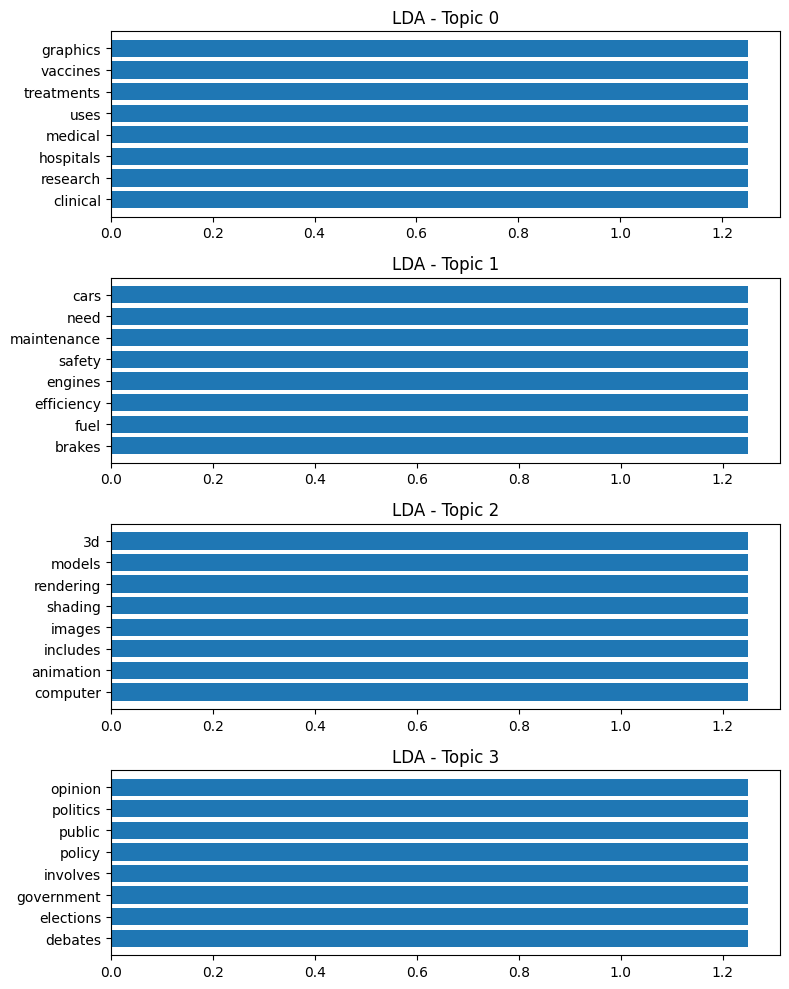

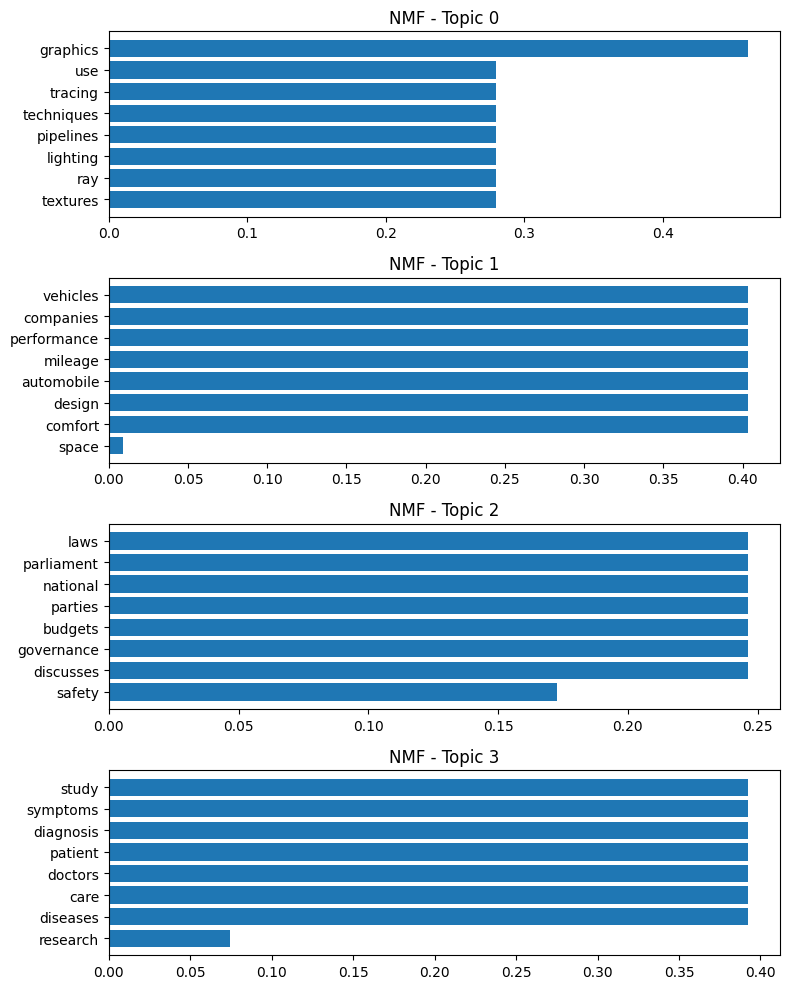

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def plot_topics(model, feature_names, topn=8, title="Topics"):
    n_topics = model.components_.shape[0]
    fig, axes = plt.subplots(n_topics, 1, figsize=(8, 2.5*n_topics))
    if n_topics == 1:
        axes = [axes]
    for i, ax in enumerate(axes):
        topic = model.components_[i]
        top_ids = np.argsort(topic)[-topn:][::-1]
        words = [feature_names[j] for j in top_ids]
        weights = topic[top_ids]
        ax.barh(words[::-1], weights[::-1])
        ax.set_title(f"{title} - Topic {i}")
    plt.tight_layout()
    plt.show()

plot_topics(lda, count_vec.get_feature_names_out(), title="LDA")
plot_topics(nmf, tfidf_vec.get_feature_names_out(), title="NMF")

In [16]:
import sys
!{sys.executable} -m pip install -U streamlit scikit-learn pandas numpy

  Using cached numpy-2.4.2-cp314-cp314-win_amd64.whl.metadata (6.6 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   --------- ------------------------------ 2.1/9.1 MB 11.9 MB/s eta 0:00:01
   ----------------- ---------------------- 3.9/9.1 MB 10.3 MB/s eta 0:00:01
   ------------------------ --------------- 5.5/9.1 MB 9.5 MB/s eta 0:00:01
   ------------------------------- -------- 7.1/9.1 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------  8.9/9.1 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------- 9.1/9.1 MB 8.1 MB/s  0:00:01
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.1 MB 8.5 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.1 MB 9.6 MB/s eta 0:00:01
   -------------------- ------------------- 5.8/11.1 MB 9.4 MB/s eta 0:00:01
   -------------------------- ---------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [17]:
import numpy as np
import pandas as pd
import streamlit as st

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

# ----------------------------
# App Config
# ----------------------------
st.set_page_config(page_title="Topic Modeling Dashboard (LDA vs NMF)", layout="wide")
st.title("Topic Modeling Research Dashboard")
st.caption("LDA (BoW) vs NMF (TF-IDF) — metrics + topics + doc-topic exploration")

# ----------------------------
# Data (safe local dataset)
# Replace this with your research abstracts if you want.
# ----------------------------
DEFAULT_DOCS = [
    "Space missions require rockets satellites orbit and propulsion systems",
    "NASA launches spacecraft and studies planets stars and galaxies",
    "Cars need engines fuel efficiency brakes safety and maintenance",
    "Automobile companies design vehicles with mileage performance and comfort",
    "Computer graphics includes rendering images 3D models animation and shading",
    "Graphics pipelines use textures lighting and ray tracing techniques",
    "Politics involves elections government policy debates and public opinion",
    "Parliament discusses laws budgets parties and national governance",
    "Medical research uses clinical trials hospitals vaccines and treatments",
    "Doctors study diseases symptoms diagnosis and patient care"
]

with st.sidebar:
    st.header("Controls")

    n_topics = st.slider("Number of topics (k)", min_value=2, max_value=12, value=4, step=1)
    max_features = st.slider("Max features (vocab size)", min_value=200, max_value=5000, value=800, step=200)
    lda_iters = st.slider("LDA max_iter", min_value=3, max_value=30, value=10, step=1)
    nmf_iters = st.slider("NMF max_iter", min_value=50, max_value=800, value=300, step=50)
    topn = st.slider("Top words per topic", min_value=5, max_value=20, value=10, step=1)

    st.divider()
    st.subheader("Data input")

    use_default = st.checkbox("Use default demo docs", value=True)

    docs = DEFAULT_DOCS
    if not use_default:
        raw = st.text_area(
            "Paste documents (one document per line)",
            height=180,
            placeholder="Doc1...\nDoc2...\nDoc3..."
        )
        if raw.strip():
            docs = [line.strip() for line in raw.splitlines() if line.strip()]

st.write(f"**Documents loaded:** {len(docs)}")

# ----------------------------
# Vectorize
# ----------------------------
@st.cache_data(show_spinner=False)
def vectorize(docs, max_features):
    count_vec = CountVectorizer(stop_words="english", max_features=max_features)
    X_counts = count_vec.fit_transform(docs)

    tfidf_vec = TfidfVectorizer(stop_words="english", max_features=max_features)
    X_tfidf = tfidf_vec.fit_transform(docs)

    return count_vec, X_counts, tfidf_vec, X_tfidf

count_vec, X_counts, tfidf_vec, X_tfidf = vectorize(docs, max_features)

# ----------------------------
# Train models
# ----------------------------
@st.cache_data(show_spinner=False)
def train_lda(X_counts, n_topics, lda_iters):
    lda = LatentDirichletAllocation(
        n_components=n_topics,
        max_iter=lda_iters,
        learning_method="batch",
        random_state=42
    )
    lda.fit(X_counts)
    perplexity = lda.perplexity(X_counts)
    doc_topic = lda.transform(X_counts)  # doc-topic distribution
    return lda, perplexity, doc_topic

@st.cache_data(show_spinner=False)
def train_nmf(X_tfidf, n_topics, nmf_iters):
    nmf = NMF(
        n_components=n_topics,
        init="nndsvda",
        max_iter=nmf_iters,
        random_state=42
    )
    nmf.fit(X_tfidf)
    recon_error = nmf.reconstruction_err_
    doc_topic = nmf.transform(X_tfidf)
    # normalize doc_topic to sum to 1 (for easier interpretation)
    doc_topic = doc_topic / (doc_topic.sum(axis=1, keepdims=True) + 1e-12)
    return nmf, recon_error, doc_topic

with st.spinner("Training LDA + NMF..."):
    lda, lda_perp, lda_doc_topic = train_lda(X_counts, n_topics, lda_iters)
    nmf, nmf_err, nmf_doc_topic = train_nmf(X_tfidf, n_topics, nmf_iters)

# ----------------------------
# Helpers
# ----------------------------
def top_words_table(model, feature_names, topn):
    rows = []
    for topic_id, topic in enumerate(model.components_):
        top_ids = np.argsort(topic)[-topn:][::-1]
        words = [feature_names[i] for i in top_ids]
        weights = [float(topic[i]) for i in top_ids]
        rows.append({
            "Topic": topic_id,
            "Top words": ", ".join(words),
            "Weights (raw)": ", ".join([f"{w:.3f}" for w in weights])
        })
    return pd.DataFrame(rows)

# ----------------------------
# Layout
# ----------------------------
col1, col2 = st.columns(2)

with col1:
    st.subheader("Model Metrics")
    mdf = pd.DataFrame({
        "Model": ["LDA", "NMF"],
        "Input Features": ["BoW (CountVectorizer)", "TF-IDF (TfidfVectorizer)"],
        "Metric": ["Perplexity (lower better)", "Reconstruction Error (lower better)"],
        "Score": [float(lda_perp), float(nmf_err)]
    })
    st.dataframe(mdf, use_container_width=True)

with col2:
    st.subheader("Quick Explanation (for viva/report)")
    st.markdown(
        "- **LDA** finds topics using word-count distributions.\n"
        "- **NMF** factorizes the TF-IDF matrix into topic components.\n"
        "- We compare using **LDA perplexity** and **NMF reconstruction error**.\n"
        "- Topics are shown using top keywords per topic and document-topic distributions."
    )

st.divider()

t1, t2 = st.columns(2)

with t1:
    st.subheader("LDA Topics (Top words)")
    lda_topics_df = top_words_table(lda, count_vec.get_feature_names_out(), topn)
    st.dataframe(lda_topics_df, use_container_width=True)

with t2:
    st.subheader("NMF Topics (Top words)")
    nmf_topics_df = top_words_table(nmf, tfidf_vec.get_feature_names_out(), topn)
    st.dataframe(nmf_topics_df, use_container_width=True)

st.divider()

st.subheader("Document → Topic Distribution (Explore)")
doc_idx = st.slider("Select document index", 0, len(docs) - 1, 0)
st.write("**Selected document:**")
st.write(docs[doc_idx])

dist_col1, dist_col2 = st.columns(2)

with dist_col1:
    st.markdown("### LDA doc-topic scores")
    lda_dist = pd.DataFrame({
        "Topic": list(range(n_topics)),
        "Score": lda_doc_topic[doc_idx].tolist()
    }).sort_values("Score", ascending=False)
    st.dataframe(lda_dist, use_container_width=True)

with dist_col2:
    st.markdown("### NMF doc-topic scores (normalized)")
    nmf_dist = pd.DataFrame({
        "Topic": list(range(n_topics)),
        "Score": nmf_doc_topic[doc_idx].tolist()
    }).sort_values("Score", ascending=False)
    st.dataframe(nmf_dist, use_container_width=True)

st.divider()

st.subheader("Export (optional)")
export = st.button("Create CSV exports")
if export:
    lda_topics_df.to_csv("lda_topics.csv", index=False)
    nmf_topics_df.to_csv("nmf_topics.csv", index=False)
    mdf.to_csv("model_metrics.csv", index=False)
    st.success("Saved: lda_topics.csv, nmf_topics.csv, model_metrics.csv in the same folder as app.py")

2026-02-23 16:03:37.173 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-23 16:03:37.178 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-23 16:03:38.287 
  command:

    streamlit run C:\Users\Lenovo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2026-02-23 16:03:38.288 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-23 16:03:38.290 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-23 16:03:38.293 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-23 16:03:38.295 Thread 'MainThread': missing ScriptRunContext! This w

UnhashableParamError: Cannot hash argument 'X_counts' (of type `scipy.sparse._csr.csr_matrix`) in 'train_lda'.

To address this, you can tell Streamlit not to hash this argument by adding a
leading underscore to the argument's name in the function signature:

```
@st.cache_data
def train_lda(_X_counts, ...):
    ...
```
            

In [18]:
from IPython.display import display, HTML

display(HTML("<h2>📊 Topic Modeling Research Dashboard (LDA vs NMF)</h2>"))
display(HTML("<p><b>Goal:</b> Compare LDA and NMF topic models on the same corpus.</p>"))

In [19]:
import pandas as pd

preview_df = pd.DataFrame({
    "Doc ID": list(range(len(docs))),
    "Document": docs
})

display(preview_df.head(5))

,Doc ID,Document
0,0,Space missions require rockets satellites orbi...
1,1,NASA launches spacecraft and studies planets s...
2,2,Cars need engines fuel efficiency brakes safet...
3,3,Automobile companies design vehicles with mile...
4,4,Computer graphics includes rendering images 3D...


In [20]:
metrics_df = pd.DataFrame({
    "Model": ["LDA", "NMF"],
    "Input Features": ["BoW (CountVectorizer)", "TF-IDF (TfidfVectorizer)"],
    "Metric Used": ["Perplexity (lower is better)", "Reconstruction Error (lower is better)"],
    "Score": [lda_perp, nmf_err]
})

display(metrics_df)

,Model,Input Features,Metric Used,Score
0,LDA,BoW (CountVectorizer),Perplexity (lower is better),164.006968
1,NMF,TF-IDF (TfidfVectorizer),Reconstruction Error (lower is better),2.431451


In [21]:
import numpy as np

def topics_table(model, feature_names, topn=10):
    rows = []
    for i, topic in enumerate(model.components_):
        top_ids = np.argsort(topic)[-topn:][::-1]
        rows.append({
            "Topic": i,
            "Top Words": ", ".join([feature_names[j] for j in top_ids])
        })
    return pd.DataFrame(rows)

lda_topics_df = topics_table(lda, count_vec.get_feature_names_out(), topn=10)
nmf_topics_df = topics_table(nmf, tfidf_vec.get_feature_names_out(), topn=10)

display(HTML("<h3>🧠 LDA Topics</h3>"))
display(lda_topics_df)

display(HTML("<h3>🧠 NMF Topics</h3>"))
display(nmf_topics_df)

,Topic,Top Words
0,0,"graphics, vaccines, treatments, uses, medical,..."
1,1,"cars, need, maintenance, safety, engines, effi..."
2,2,"3d, models, rendering, shading, images, includ..."
3,3,"opinion, politics, public, policy, involves, g..."


,Topic,Top Words
0,0,"graphics, use, tracing, techniques, pipelines,..."
1,1,"vehicles, companies, performance, mileage, aut..."
2,2,"laws, parliament, national, parties, budgets, ..."
3,3,"study, symptoms, diagnosis, patient, doctors, ..."


In [22]:
from IPython.display import clear_output
import ipywidgets as widgets

doc_slider = widgets.IntSlider(value=0, min=0, max=len(docs)-1, step=1, description="Doc ID")
out = widgets.Output()

def show_doc_topics(change=None):
    with out:
        clear_output(wait=True)
        idx = doc_slider.value
        
        display(HTML(f"<b>Selected Document:</b><br>{docs[idx]}"))
        
        lda_dist = pd.DataFrame({
            "Topic": range(n_topics),
            "LDA Score": lda_doc_topic[idx]
        }).sort_values("LDA Score", ascending=False)
        
        nmf_dist = pd.DataFrame({
            "Topic": range(n_topics),
            "NMF Score": nmf_doc_topic[idx]
        }).sort_values("NMF Score", ascending=False)
        
        display(HTML("<h4>LDA Document-Topic Distribution</h4>"))
        display(lda_dist)
        
        display(HTML("<h4>NMF Document-Topic Distribution</h4>"))
        display(nmf_dist)

doc_slider.observe(show_doc_topics, names="value")
display(doc_slider, out)
show_doc_topics()

ModuleNotFoundError: No module named 'ipywidgets'

In [23]:
# Pick any document index manually
doc_idx = 0  # change this number to explore different docs

print("Selected Document:\n", docs[doc_idx], "\n")

lda_dist = pd.DataFrame({
    "Topic": range(n_topics),
    "LDA Score": lda_doc_topic[doc_idx]
}).sort_values("LDA Score", ascending=False)

nmf_dist = pd.DataFrame({
    "Topic": range(n_topics),
    "NMF Score": nmf_doc_topic[doc_idx]
}).sort_values("NMF Score", ascending=False)

display(lda_dist)
display(nmf_dist)

Selected Document:
 Space missions require rockets satellites orbit and propulsion systems 



NameError: name 'lda_doc_topic' is not defined

In [24]:
import sys
!{sys.executable} -m pip install -U ipywidgets

   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   ---------------------------------------- 914.9/914.9 kB 11.3 MB/s  0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------------------------------- - 2.1/2.2 MB 14.3 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 12.6 MB/s  0:00:00

   ------------- -------------------------- 1/3 [jupyterlab_widgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   ---------------------------------------- 3/3 [ipywidgets]



In [26]:
from IPython.display import clear_output
import ipywidgets as widgets

doc_slider = widgets.IntSlider(value=0, min=0, max=len(docs)-1, step=1, description="Doc ID")
out = widgets.Output()

def show_doc_topics(change=None):
    with out:
        clear_output(wait=True)
        idx = doc_slider.value
        
        display(HTML(f"<b>Selected Document:</b><br>{docs[idx]}"))
        
        lda_dist = pd.DataFrame({
            "Topic": range(n_topics),
            "LDA Score": lda_doc_topic[idx]
        }).sort_values("LDA Score", ascending=False)
        
        nmf_dist = pd.DataFrame({
            "Topic": range(n_topics),
            "NMF Score": nmf_doc_topic[idx]
        }).sort_values("NMF Score", ascending=False)
        
        display(HTML("<h4>LDA Document-Topic Distribution</h4>"))
        display(lda_dist)
        
        display(HTML("<h4>NMF Document-Topic Distribution</h4>"))
        display(nmf_dist)

doc_slider.observe(show_doc_topics, names="value")
display(doc_slider, out)
show_doc_topics()

NameError: name 'lda_doc_topic' is not defined

In [27]:
print("Have lda?", 'lda' in globals())
print("Have nmf?", 'nmf' in globals())

Have lda? True
Have nmf? True


In [28]:
# LDA document-topic distribution
lda_doc_topic = lda.transform(X_counts)

# NMF document-topic distribution (normalized)
nmf_doc_topic = nmf.transform(X_tfidf)
nmf_doc_topic = nmf_doc_topic / (nmf_doc_topic.sum(axis=1, keepdims=True) + 1e-12)

print("Shapes -> LDA:", lda_doc_topic.shape, "NMF:", nmf_doc_topic.shape)

Shapes -> LDA: (10, 4) NMF: (10, 4)


In [29]:
doc_idx = 0  # try 0, 1, 2, ...
print("Selected Document:\n", docs[doc_idx], "\n")

lda_dist = pd.DataFrame({
    "Topic": range(n_topics),
    "LDA Score": lda_doc_topic[doc_idx]
}).sort_values("LDA Score", ascending=False)

nmf_dist = pd.DataFrame({
    "Topic": range(n_topics),
    "NMF Score": nmf_doc_topic[doc_idx]
}).sort_values("NMF Score", ascending=False)

display(lda_dist)
display(nmf_dist)

Selected Document:
 Space missions require rockets satellites orbit and propulsion systems 



,Topic,LDA Score
2,2,0.916531
3,3,0.027823
1,1,0.027823
0,0,0.027822


,Topic,NMF Score
2,2,0.664663
1,1,0.335040
0,0,0.000298
3,3,0.000000


In [30]:
# ====== ONE-CELL TOPIC MODELING DASHBOARD (Jupyter) ======
from IPython.display import display, HTML
import numpy as np
import pandas as pd

# ---- 0) Quick checks (if anything missing, stop with a clear message)
required = ["docs", "X_counts", "X_tfidf", "count_vec", "tfidf_vec", "lda", "nmf", "n_topics", "lda_perp", "nmf_err"]
missing = [v for v in required if v not in globals()]
if missing:
    raise NameError(
        "These variables are missing: " + ", ".join(missing) +
        "\nRe-run your earlier cells that create them (docs/vectorize/train)."
    )

# ---- 1) Choose which document to inspect in the dashboard
doc_idx = 0  # change this to 1,2,3... and re-run the cell

# ---- 2) Ensure doc-topic distributions exist (create if not)
lda_doc_topic = lda.transform(X_counts)
nmf_doc_topic = nmf.transform(X_tfidf)
nmf_doc_topic = nmf_doc_topic / (nmf_doc_topic.sum(axis=1, keepdims=True) + 1e-12)

# ---- 3) Helpers
def topics_table(model, feature_names, topn=10):
    rows = []
    for i, topic in enumerate(model.components_):
        top_ids = np.argsort(topic)[-topn:][::-1]
        rows.append({"Topic": i, "Top Words": ", ".join(feature_names[j] for j in top_ids)})
    return pd.DataFrame(rows)

def metric_table(lda_perp, nmf_err):
    return pd.DataFrame({
        "Model": ["LDA", "NMF"],
        "Input Features": ["BoW (CountVectorizer)", "TF-IDF (TfidfVectorizer)"],
        "Metric": ["Perplexity (lower is better)", "Reconstruction Error (lower is better)"],
        "Score": [float(lda_perp), float(nmf_err)]
    })

# ---- 4) Build tables
preview_df = pd.DataFrame({"Doc ID": range(len(docs)), "Document": docs}).head(5)
metrics_df = metric_table(lda_perp, nmf_err)
lda_topics_df = topics_table(lda, count_vec.get_feature_names_out(), topn=10)
nmf_topics_df = topics_table(nmf, tfidf_vec.get_feature_names_out(), topn=10)

lda_dist = pd.DataFrame({"Topic": range(n_topics), "LDA Score": lda_doc_topic[doc_idx]}).sort_values("LDA Score", ascending=False)
nmf_dist = pd.DataFrame({"Topic": range(n_topics), "NMF Score": nmf_doc_topic[doc_idx]}).sort_values("NMF Score", ascending=False)

# ---- 5) Render "dashboard" layout in notebook
display(HTML("<h2>📊 Topic Modeling Research Dashboard (LDA vs NMF)</h2>"))
display(HTML(f"<p><b>Total Documents:</b> {len(docs)} | <b>Topics (k):</b> {n_topics} | <b>Selected Doc ID:</b> {doc_idx}</p>"))

display(HTML("<h3>1) Dataset Preview (first 5 docs)</h3>"))
display(preview_df)

display(HTML("<h3>2) Model Metrics</h3>"))
display(metrics_df)

display(HTML("<h3>3) Topics (Top words per topic)</h3>"))
display(HTML("<h4>LDA Topics</h4>"))
display(lda_topics_df)
display(HTML("<h4>NMF Topics</h4>"))
display(nmf_topics_df)

display(HTML("<h3>4) Document → Topic Distribution</h3>"))
display(HTML("<b>Selected Document Text:</b>"))
display(pd.DataFrame({"Document": [docs[doc_idx]]}))

display(HTML("<h4>LDA Doc-Topic Scores</h4>"))
display(lda_dist)

display(HTML("<h4>NMF Doc-Topic Scores (normalized)</h4>"))
display(nmf_dist)

display(HTML("<hr><p><b>Tip:</b> Change <code>doc_idx</code> at the top of this cell and re-run to explore other documents.</p>"))

,Doc ID,Document
0,0,Space missions require rockets satellites orbi...
1,1,NASA launches spacecraft and studies planets s...
2,2,Cars need engines fuel efficiency brakes safet...
3,3,Automobile companies design vehicles with mile...
4,4,Computer graphics includes rendering images 3D...


,Model,Input Features,Metric,Score
0,LDA,BoW (CountVectorizer),Perplexity (lower is better),164.006968
1,NMF,TF-IDF (TfidfVectorizer),Reconstruction Error (lower is better),2.431451


,Topic,Top Words
0,0,"graphics, vaccines, treatments, uses, medical,..."
1,1,"cars, need, maintenance, safety, engines, effi..."
2,2,"3d, models, rendering, shading, images, includ..."
3,3,"opinion, politics, public, policy, involves, g..."


,Topic,Top Words
0,0,"graphics, use, tracing, techniques, pipelines,..."
1,1,"vehicles, companies, performance, mileage, aut..."
2,2,"laws, parliament, national, parties, budgets, ..."
3,3,"study, symptoms, diagnosis, patient, doctors, ..."


,Document
0,Space missions require rockets satellites orbi...


,Topic,LDA Score
2,2,0.916531
3,3,0.027823
1,1,0.027823
0,0,0.027822


,Topic,NMF Score
2,2,0.664663
1,1,0.335040
0,0,0.000298
3,3,0.000000


In [31]:
# ====== ONE-CELL TOPIC MODELING DASHBOARD (Jupyter) ======
from IPython.display import display, HTML
import numpy as np
import pandas as pd

# ---- 0) Quick checks (if anything missing, stop with a clear message)
required = ["docs", "X_counts", "X_tfidf", "count_vec", "tfidf_vec", "lda", "nmf", "n_topics", "lda_perp", "nmf_err"]
missing = [v for v in required if v not in globals()]
if missing:
    raise NameError(
        "These variables are missing: " + ", ".join(missing) +
        "\nRe-run your earlier cells that create them (docs/vectorize/train)."
    )

# ---- 1) Choose which document to inspect in the dashboard
doc_idx = 2  # change this to 1,2,3... and re-run the cell

# ---- 2) Ensure doc-topic distributions exist (create if not)
lda_doc_topic = lda.transform(X_counts)
nmf_doc_topic = nmf.transform(X_tfidf)
nmf_doc_topic = nmf_doc_topic / (nmf_doc_topic.sum(axis=1, keepdims=True) + 1e-12)

# ---- 3) Helpers
def topics_table(model, feature_names, topn=10):
    rows = []
    for i, topic in enumerate(model.components_):
        top_ids = np.argsort(topic)[-topn:][::-1]
        rows.append({"Topic": i, "Top Words": ", ".join(feature_names[j] for j in top_ids)})
    return pd.DataFrame(rows)

def metric_table(lda_perp, nmf_err):
    return pd.DataFrame({
        "Model": ["LDA", "NMF"],
        "Input Features": ["BoW (CountVectorizer)", "TF-IDF (TfidfVectorizer)"],
        "Metric": ["Perplexity (lower is better)", "Reconstruction Error (lower is better)"],
        "Score": [float(lda_perp), float(nmf_err)]
    })

# ---- 4) Build tables
preview_df = pd.DataFrame({"Doc ID": range(len(docs)), "Document": docs}).head(5)
metrics_df = metric_table(lda_perp, nmf_err)
lda_topics_df = topics_table(lda, count_vec.get_feature_names_out(), topn=10)
nmf_topics_df = topics_table(nmf, tfidf_vec.get_feature_names_out(), topn=10)

lda_dist = pd.DataFrame({"Topic": range(n_topics), "LDA Score": lda_doc_topic[doc_idx]}).sort_values("LDA Score", ascending=False)
nmf_dist = pd.DataFrame({"Topic": range(n_topics), "NMF Score": nmf_doc_topic[doc_idx]}).sort_values("NMF Score", ascending=False)

# ---- 5) Render "dashboard" layout in notebook
display(HTML("<h2>📊 Topic Modeling Research Dashboard (LDA vs NMF)</h2>"))
display(HTML(f"<p><b>Total Documents:</b> {len(docs)} | <b>Topics (k):</b> {n_topics} | <b>Selected Doc ID:</b> {doc_idx}</p>"))

display(HTML("<h3>1) Dataset Preview (first 5 docs)</h3>"))
display(preview_df)

display(HTML("<h3>2) Model Metrics</h3>"))
display(metrics_df)

display(HTML("<h3>3) Topics (Top words per topic)</h3>"))
display(HTML("<h4>LDA Topics</h4>"))
display(lda_topics_df)
display(HTML("<h4>NMF Topics</h4>"))
display(nmf_topics_df)

display(HTML("<h3>4) Document → Topic Distribution</h3>"))
display(HTML("<b>Selected Document Text:</b>"))
display(pd.DataFrame({"Document": [docs[doc_idx]]}))

display(HTML("<h4>LDA Doc-Topic Scores</h4>"))
display(lda_dist)

display(HTML("<h4>NMF Doc-Topic Scores (normalized)</h4>"))
display(nmf_dist)

display(HTML("<hr><p><b>Tip:</b> Change <code>doc_idx</code> at the top of this cell and re-run to explore other documents.</p>"))

,Doc ID,Document
0,0,Space missions require rockets satellites orbi...
1,1,NASA launches spacecraft and studies planets s...
2,2,Cars need engines fuel efficiency brakes safet...
3,3,Automobile companies design vehicles with mile...
4,4,Computer graphics includes rendering images 3D...


,Model,Input Features,Metric,Score
0,LDA,BoW (CountVectorizer),Perplexity (lower is better),164.006968
1,NMF,TF-IDF (TfidfVectorizer),Reconstruction Error (lower is better),2.431451


,Topic,Top Words
0,0,"graphics, vaccines, treatments, uses, medical,..."
1,1,"cars, need, maintenance, safety, engines, effi..."
2,2,"3d, models, rendering, shading, images, includ..."
3,3,"opinion, politics, public, policy, involves, g..."


,Topic,Top Words
0,0,"graphics, use, tracing, techniques, pipelines,..."
1,1,"vehicles, companies, performance, mileage, aut..."
2,2,"laws, parliament, national, parties, budgets, ..."
3,3,"study, symptoms, diagnosis, patient, doctors, ..."


,Document
0,Cars need engines fuel efficiency brakes safet...


,Topic,LDA Score
1,1,0.916585
3,3,0.027809
0,0,0.027808
2,2,0.027799


,Topic,NMF Score
2,2,1.0
0,0,0.0
1,1,0.0
3,3,0.0
